In [1]:
import numpy as np
from scipy.special import jv
import matplotlib.pyplot as plt
from time import time
import cmath
from scipy.integrate import quad

# === Константы ===
f = 10e5
sigma = 1. / 30.
eps = 3 * 8.85e-12
mu = 1.25e-6
w = 2 * cmath.pi * f
gamma = sigma - 1j * w * eps
I0 = 1

# === Функции расчёта ===
def compute_p(m):
    """Вычисление комплексного корня sqrt(m^2 - i w mu gamma)"""
    return cmath.sqrt(m**2 - 1j * w * mu * gamma)

def complex_integrand(m, r, r0, z):
    """Комплексная подынтегральная функция"""
    p_val = compute_p(m)
    I_amplitude = 1j * mu * w * I0 * r0 / 2.
    return I_amplitude * jv(1, m*r) * jv(1, m*r0) * (m / p_val) * cmath.exp(-p_val * abs(z))

def integrate_complex_function(r, r0, z, max_m):
    """Вычисление интеграла по вещественной и мнимой части с quad"""
    
    def real_func(m):
        return np.real(complex_integrand(m, r, r0, z))

    def imag_func(m):
        return np.imag(complex_integrand(m, r, r0, z))

    quad_opts = {
        'epsabs': 1e-9,
        'epsrel': 1e-8,
        'limit': 1000
    }

    # Интегрируем вещественную и мнимую части с quad
    real_part, real_err = quad(real_func, 0, max_m, **quad_opts)
    imag_part, imag_err = quad(imag_func, 0, max_m, **quad_opts)

    result = complex(real_part, imag_part)  # Результат интеграла
    # Ошибки для каждого интеграла
    real_error = abs(real_err)  # Ошибка для вещественной части
    imag_error = abs(imag_err)  # Ошибка для мнимой части
    return result, real_error, imag_error

def visualize_integrand(r, r0, z, max_m):
    """Графическое представление подынтегральной функции"""
    m_vals = np.logspace(-4, np.log10(max_m), 1000)
    real_vals = []
    imag_vals = []
    abs_vals = []

    for m in m_vals:
        val = complex_integrand(m, r, r0, z)
        real_vals.append(val.real)
        imag_vals.append(val.imag)
        abs_vals.append(abs(val))

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.semilogx(m_vals, real_vals, 'r-')
    plt.title('Вещественная часть')
    plt.xlabel('m')
    plt.ylabel('Re(Integrand)')
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.semilogx(m_vals, imag_vals, 'g-')
    plt.title('Мнимая часть')
    plt.xlabel('m')
    plt.ylabel('Im(Integrand)')
    plt.grid(True)

    plt.suptitle(f'График подынтегральной функции для z = {z:.2f}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# === Основной интерфейс ===
def compute_complex_sqrt_integral(r, r0, z, max_m=1000, visual_debug=True):
    if visual_debug:
        visualize_integrand(r, r0, z, max_m)

    result, real_error, imag_error = integrate_complex_function(r, r0, z, max_m)
    return result, real_error, imag_error


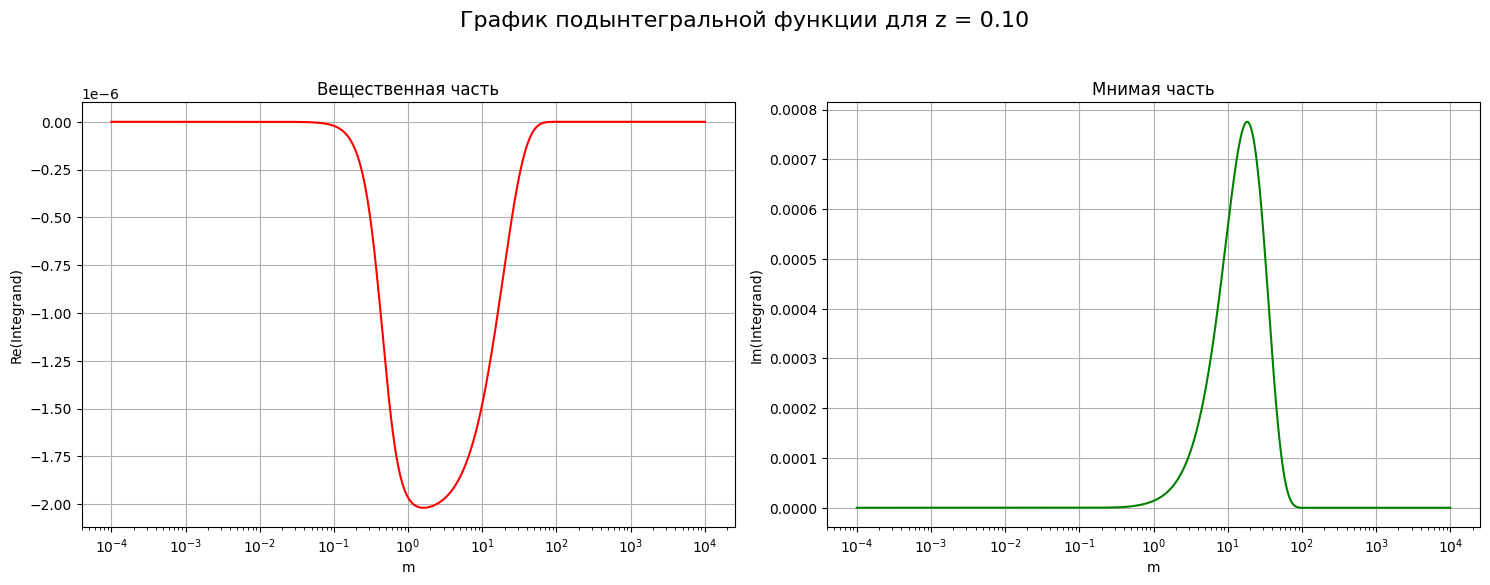

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
0.10 | -3.66188625e-05 | 2.40996353e-02 |  3.64015633e-11 | 1.87384069e-12


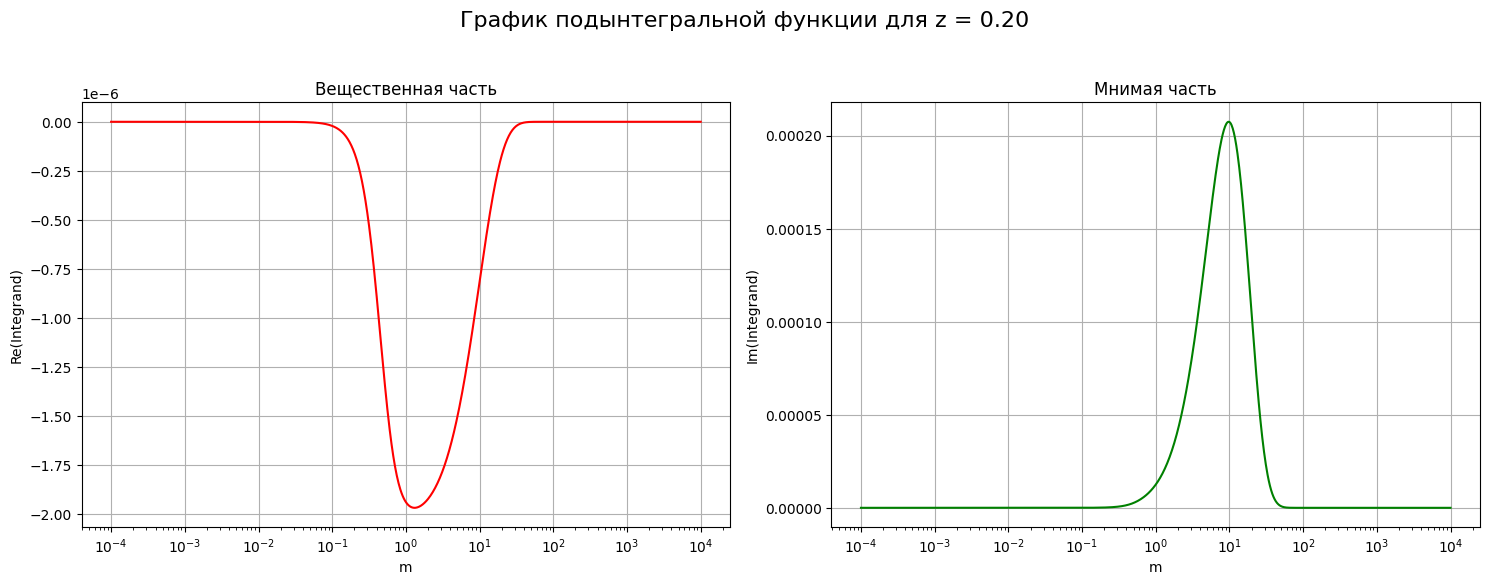

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
0.20 | -1.90849497e-05 | 3.65149881e-03 |  3.66219106e-11 | 4.81104796e-10


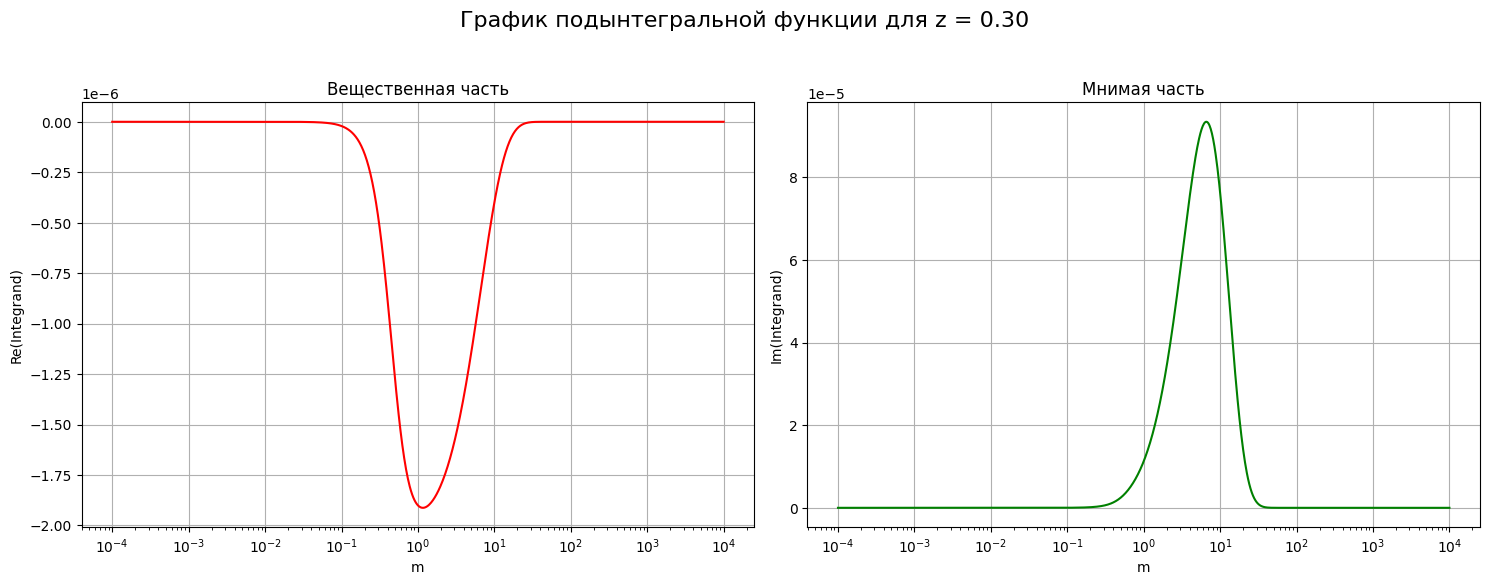

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
0.30 | -1.25754049e-05 | 1.12512530e-03 |  3.69607108e-11 | 2.08795925e-12


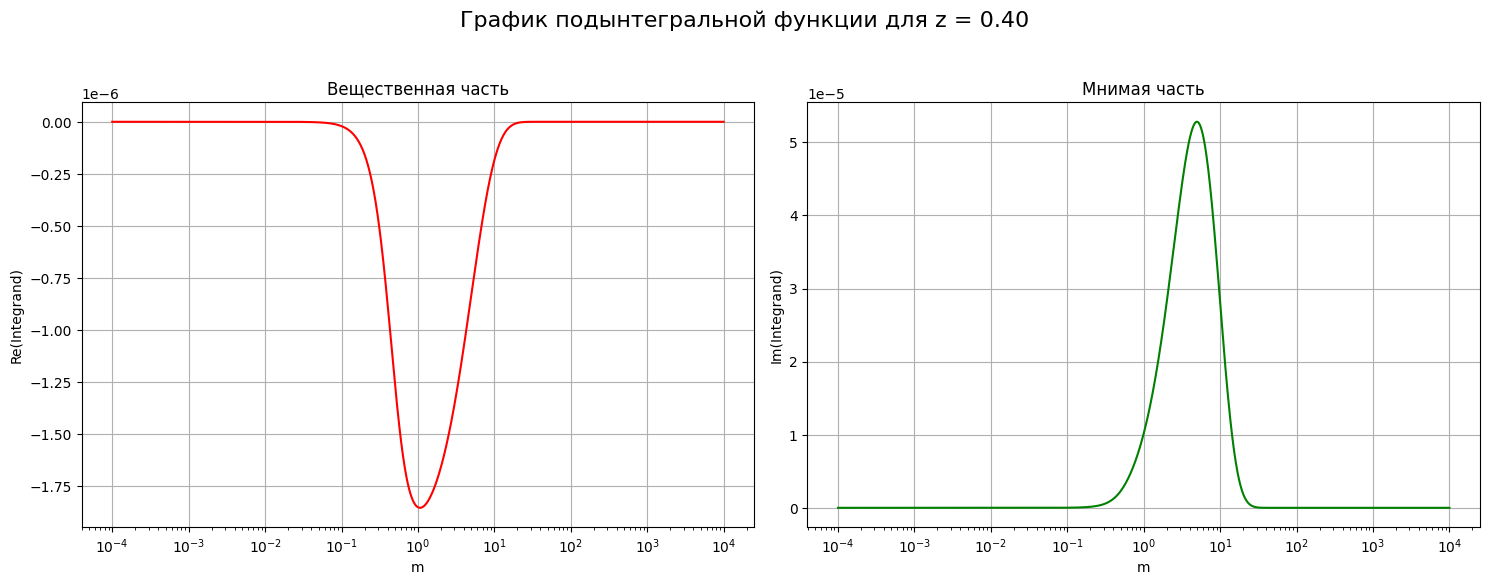

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
0.40 | -9.23575662e-06 | 4.80989718e-04 |  3.74018206e-11 | 2.20401055e-12


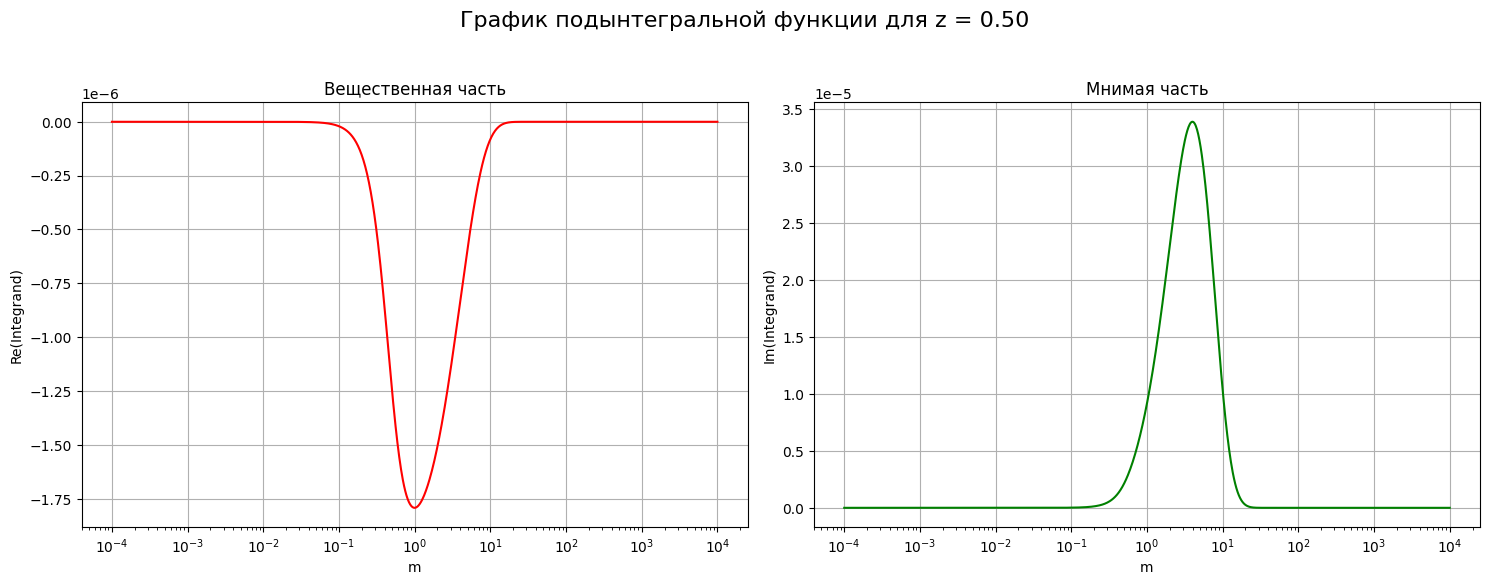

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
0.50 | -7.21235012e-06 | 2.47516375e-04 |  3.79332493e-11 | 2.32685128e-12


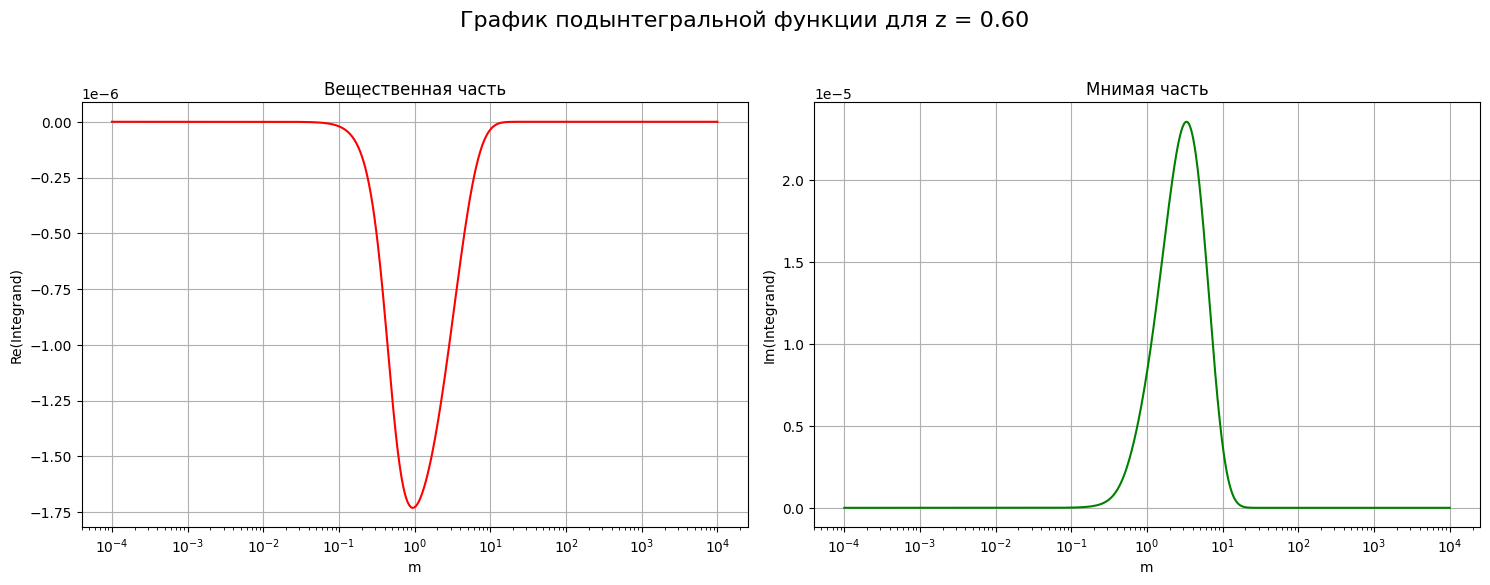

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
0.60 | -5.85757854e-06 | 1.43429296e-04 |  3.85459539e-11 | 2.45686514e-12


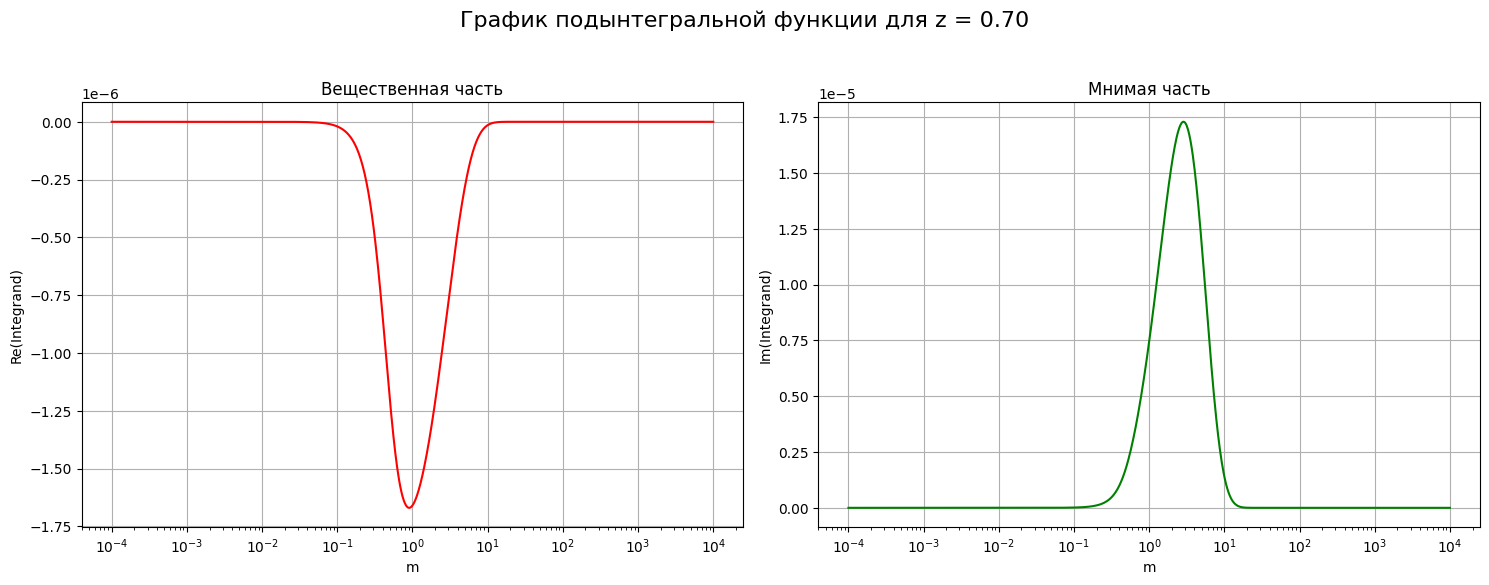

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
0.70 | -4.88812858e-06 | 9.02403685e-05 |  3.92330362e-11 | 2.59447184e-12


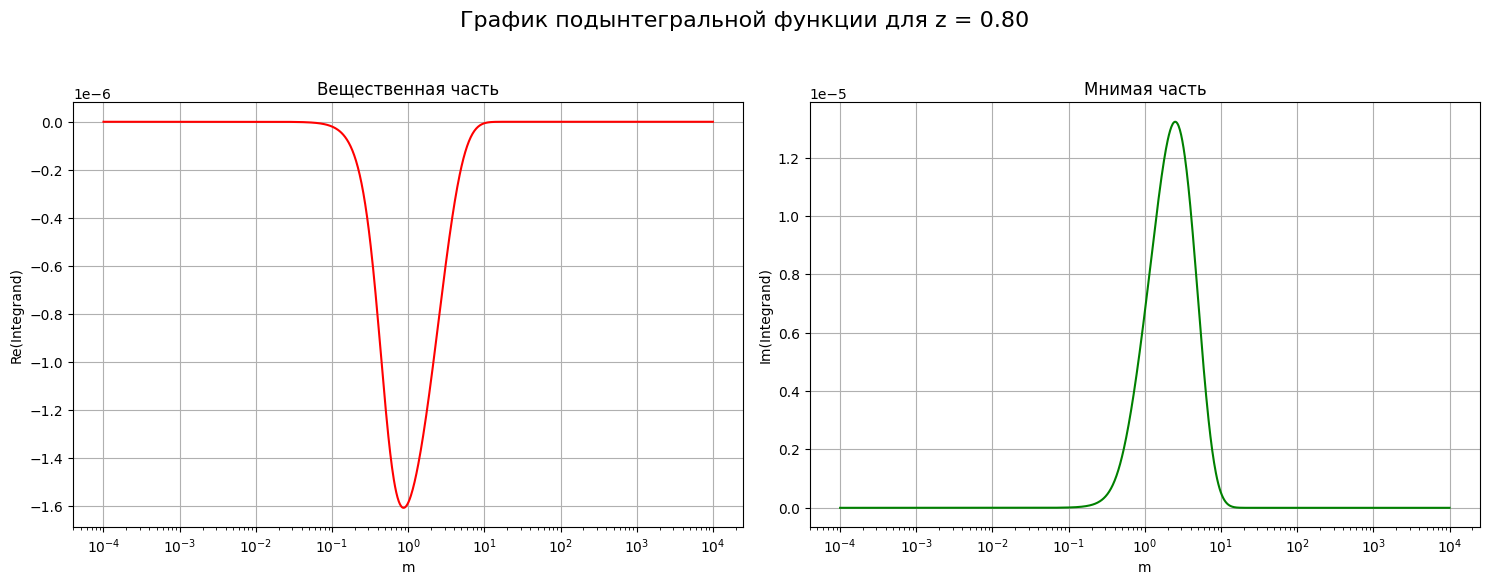

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
0.80 | -4.16077240e-06 | 6.02985127e-05 |  3.99891912e-11 | 2.74011747e-12


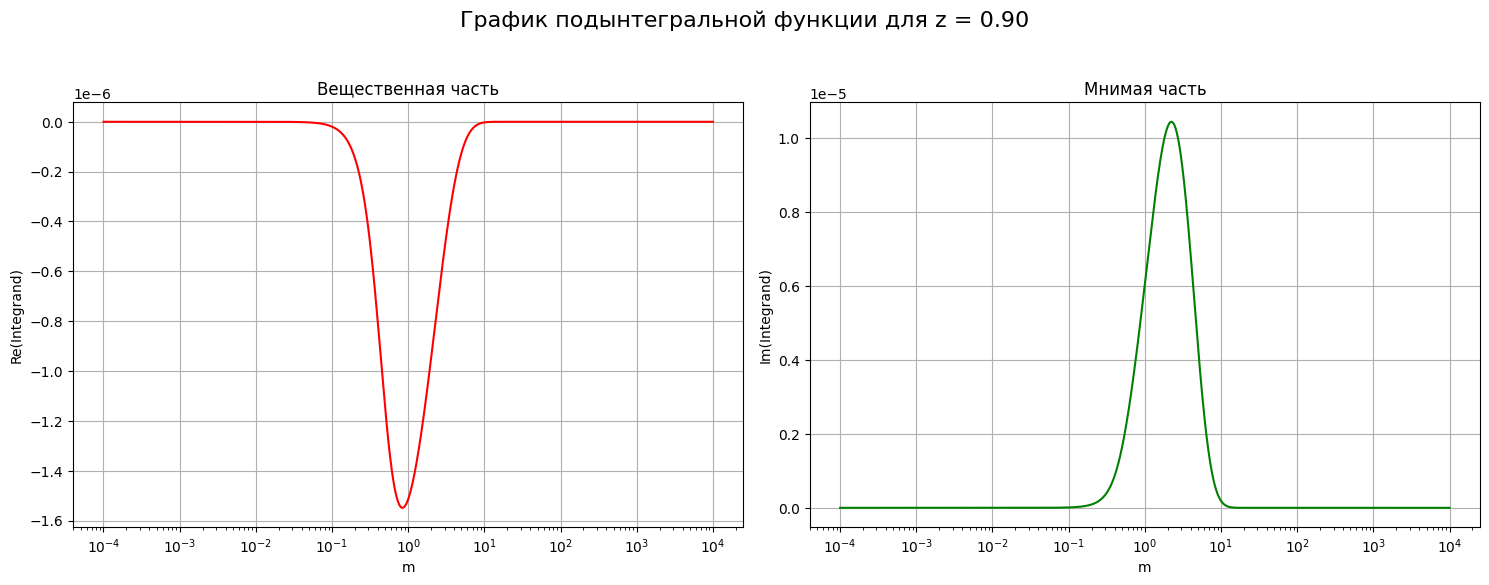

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
0.90 | -3.59540463e-06 | 4.21808282e-05 |  4.08103201e-11 | 2.89426962e-12


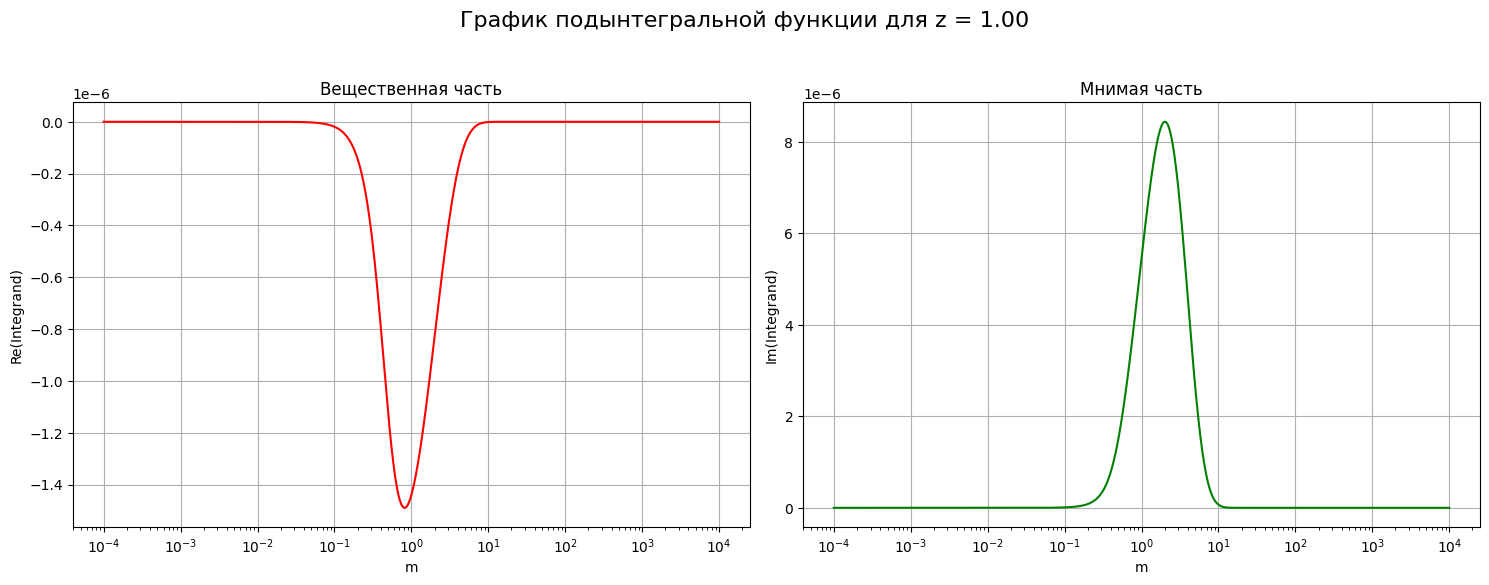

   z |      Re(result) |      Im(result) |        Re Error |        Im Error
----------------------------------------------------------------------
1.00 | -3.14374850e-06 | 3.05870629e-05 |  4.16932519e-11 | 3.05741885e-12


In [2]:
if __name__ == "__main__":
    params = {
        'r': 0.04,
        'r0': 0.02,
        'max_m': 1e4,
        'visual_debug': True  # отключим графики для серии расчетов
    }

    results = []

    for z in np.arange(0.1, 1.01, 0.1):
        params['z'] = z
        start_time = time()
        result, real_error, imag_error = compute_complex_sqrt_integral(**params)
        compute_time = time() - start_time

        results.append((z, result, real_error, imag_error))
        print(f"{'z':>4} | {'Re(result)':>15} | {'Im(result)':>15} | {'Re Error':>15} | {'Im Error':>15}")
        print("-" * 70)
        print(f"{z:4.2f} | {result.real:10.8e} | {result.imag:10.8e} | "
              f" {real_error:12.8e} | {imag_error:12.8e}")
